In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/cs-training.csv")
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('SeriousDlqin2yrs', axis=1)

In [4]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
skewness = df.apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewness)

MonthlyIncome                           114.040318
RevolvingUtilizationOfUnsecuredLines     97.631574
DebtRatio                                95.157793
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfTimes90DaysLate                  23.087345
NumberOfTime30-59DaysPastDueNotWorse     22.597108
NumberRealEstateLoansOrLines              3.482484
NumberOfDependents                        1.588242
NumberOfOpenCreditLinesAndLoans           1.215314
age                                       0.188995
dtype: float64


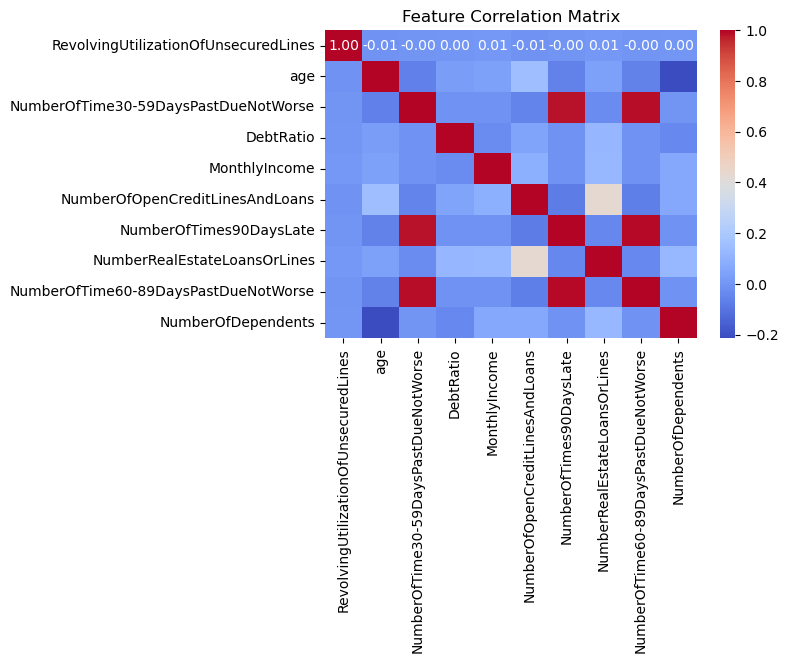

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

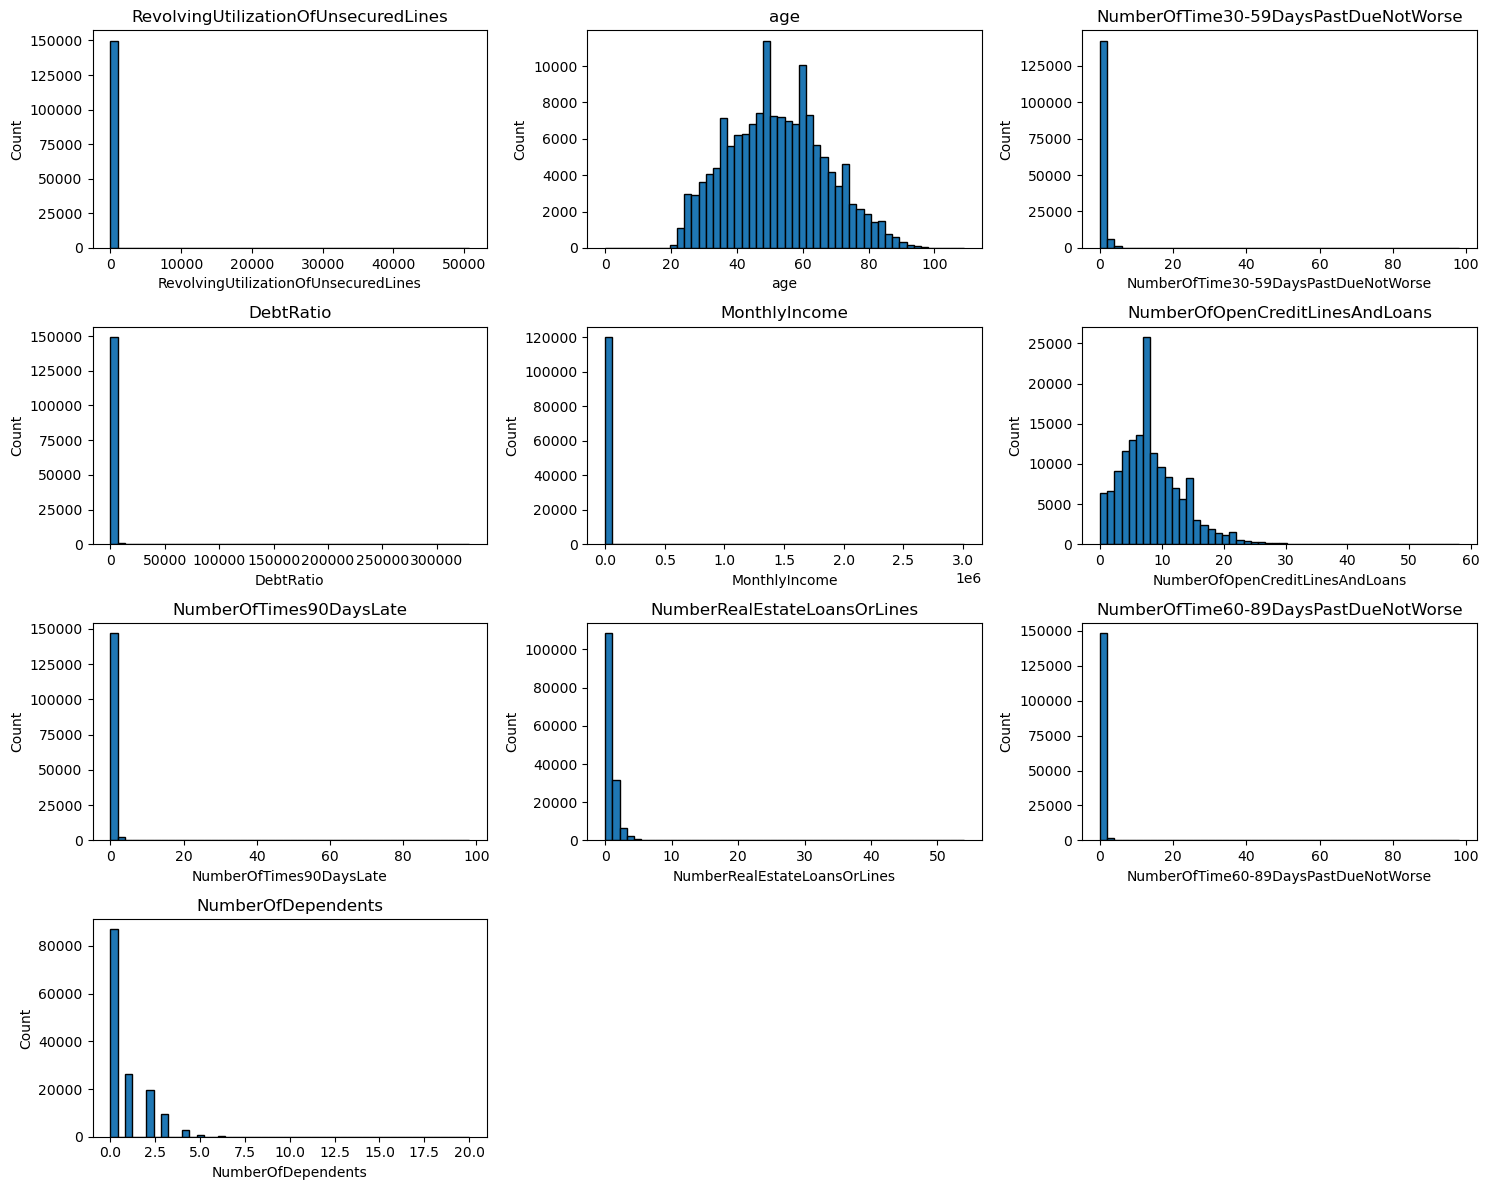

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50, edgecolor='k')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

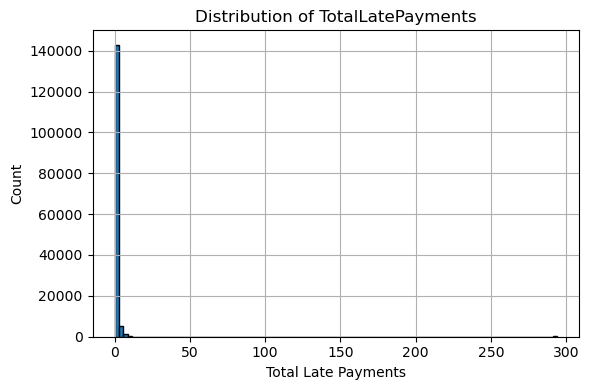

In [10]:
df['TotalLatePayments'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] 
                            + df['NumberOfTime60-89DaysPastDueNotWorse'] 
                            + df['NumberOfTimes90DaysLate'])

plt.figure(figsize=(6,4))
df['TotalLatePayments'].hist(bins=100, edgecolor='k')
plt.title("Distribution of TotalLatePayments")
plt.xlabel("Total Late Payments")
plt.ylabel("Count")
plt.tight_layout()
plt.show()